# Normative Modeling with the PCNtoolkit

Add conda as an environment for jupyter:
`python -m ipykernel install --user --name={env_name}`

In [1]:
# %pip install https://github.com/amarquand/PCNtoolkit/archive/refs|

In [2]:
import os

import pandas as pd
from pcntoolkit.dataio.norm_data import NormData
from pcntoolkit.normative_model.norm_conf import NormConf
from pcntoolkit.normative_model.norm_hbr import NormHBR
from pcntoolkit.regression_model.hbr.hbr_conf import HBRConf
from pcntoolkit.regression_model.hbr.likelihood import NormalLikelihood
from pcntoolkit.regression_model.hbr.prior import make_prior
from pcntoolkit.util.runner import Runner
from pcntoolkit.regression_model.blr.blr_conf import BLRConf
from pcntoolkit.normative_model.norm_blr import NormBLR

resources_dir = "resources"
abs_path = os.path.abspath(resources_dir)
data_dir = os.path.join(abs_path, "data")
os.makedirs(data_dir, exist_ok=True)

In [3]:
# If you are running this notebook for the first time, you need to download the dataset from github.
# If you have already downloaded the dataset, you can comment out the following line

pd.read_csv(
    "https://raw.githubusercontent.com/predictive-clinical-neuroscience/PCNtoolkit-demo/refs/heads/main/data/fcon1000.csv"
).to_csv(os.path.join(data_dir, "fcon1000.csv"), index=False)

data = pd.read_csv(os.path.join(data_dir, "fcon1000.csv"))

covariates = ["age"]
batch_effects = ["sex", "site"]
response_vars = "lh_G_temp_sup-G_T_transv_thickness,lh_G_temp_sup-Lateral_thickness,lh_G_temp_sup-Plan_polar_thickness".split(
    ","
)

# response_vars = "lh_G&S_frontomargin_thickness,lh_G&S_occipital_inf_thickness,lh_G&S_paracentral_thickness,lh_G&S_subcentral_thickness,lh_G&S_transv_frontopol_thickness,lh_G&S_cingul-Ant_thickness,lh_G&S_cingul-Mid-Ant_thickness,lh_G&S_cingul-Mid-Post_thickness,lh_G_cingul-Post-dorsal_thickness,lh_G_cingul-Post-ventral_thickness,lh_G_cuneus_thickness,lh_G_front_inf-Opercular_thickness,lh_G_front_inf-Orbital_thickness,lh_G_front_inf-Triangul_thickness,lh_G_front_middle_thickness,lh_G_front_sup_thickness,lh_G_Ins_lg&S_cent_ins_thickness,lh_G_insular_short_thickness,lh_G_occipital_middle_thickness,lh_G_occipital_sup_thickness,lh_G_oc-temp_lat-fusifor_thickness,lh_G_oc-temp_med-Lingual_thickness,lh_G_oc-temp_med-Parahip_thickness,lh_G_orbital_thickness,lh_G_pariet_inf-Angular_thickness".split(",")
norm_data = NormData.from_dataframe(
    name="full",
    dataframe=data,
    covariates=covariates,
    batch_effects=batch_effects,
    response_vars=response_vars,
)

# Split into train and test sets

train, test = norm_data.train_test_split()


In [4]:
train

<xarray.NormData> Size: 152kB
Dimensions:            (datapoints: 862, covariates: 1, response_vars: 3,
                        batch_effect_dims: 2)
Coordinates:
  * datapoints         (datapoints) int64 7kB 229 143 872 176 ... 389 741 705
  * response_vars      (response_vars) <U34 408B 'lh_G_temp_sup-G_T_transv_th...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
Data variables:
    X                  (datapoints, covariates) float64 7kB 19.0 20.0 ... 52.0
    y                  (datapoints, response_vars) float64 21kB 2.253 ... 2.91
    batch_effects      (datapoints, batch_effect_dims) <U17 117kB '0' ... 'Mi...
Attributes:
    name:                  full_train
    unique_batch_effects:  {'sex': ['0', '1'], 'site': ['AnnArbor_a', 'AnnArb...
    batch_effects_counts:  {'sex': {'0': 589, '1': 489}, 'site': {'AnnArbor_a...

In [5]:
# Create a NormConf object
save_dir = os.path.join(abs_path, "save_dir")

norm_conf = NormConf(
    savemodel=True,
    saveresults=True,
    save_dir=save_dir,
    inscaler="standardize",
    outscaler="standardize",
    basis_function="bspline",
    basis_function_kwargs={"order": 3, "nknots": 5},
)

Process: 99978 - Configuration of normative model is valid.


In [6]:
blr_conf = BLRConf(
    n_iter=100,
    intercept=True,
    random_intercept=True,
    heteroskedastic=True,
    random_intercept_var=False,
    warp="warpsinharcsinh",
    warp_reparam=False,
)

Process: 99978 - Configuration of regression model is valid.


In [7]:
new_hbr_model = NormBLR(norm_conf=norm_conf, reg_conf=blr_conf)
sandbox_dir = os.path.join(resources_dir, "runner_dir")
os.makedirs(sandbox_dir, exist_ok=True)

In [8]:
new_hbr_model.fit_predict(train, test)

Process: 99978 - Fitting and predicting 3 response variables.
Process: 99978 - Fitting and predicting model for lh_G_temp_sup-G_T_transv_thickness.
Process: 99978 - Fitting and predicting model for lh_G_temp_sup-Lateral_thickness.
Process: 99978 - Fitting and predicting model for lh_G_temp_sup-Plan_polar_thickness.
Process: 99978 - Saving model to /Users/stijndeboer/Projects/PCN/Crash course/resources/save_dir.
Process: 99978 - Computing log-probabilities for 3 response variables.
Process: 99978 - Computing log-probabilities for lh_G_temp_sup-Plan_polar_thickness.
Process: 99978 - Computing log-probabilities for lh_G_temp_sup-Lateral_thickness.
Process: 99978 - Computing log-probabilities for lh_G_temp_sup-G_T_transv_thickness.
Process: 99978 - Computing z-scores for 3 response variables.
Process: 99978 - Computing z-scores for lh_G_temp_sup-Plan_polar_thickness.
Process: 99978 - Computing z-scores for lh_G_temp_sup-Lateral_thickness.
Process: 99978 - Computing z-scores for lh_G_temp_s

/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)
/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)
/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWar

<xarray.NormData> Size: 126kB
Dimensions:            (datapoints: 216, response_vars: 3, covariates: 1,
                        batch_effect_dims: 2, basis_functions: 7, cdf: 5,
                        measure: 8)
Coordinates:
  * datapoints         (datapoints) int64 2kB 756 769 692 616 ... 751 470 1043
  * response_vars      (response_vars) <U34 408B 'lh_G_temp_sup-G_T_transv_th...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
  * basis_functions    (basis_functions) <U13 364B 'age_bspline_0' ... 'age_b...
  * cdf                (cdf) float64 40B 0.05 0.25 0.5 0.75 0.95
  * measure            (measure) <U8 256B 'MSLL' 'NLL' ... 'SMSE' 'ShapiroW'
Data variables:
    X                  (datapoints, covariates) float64 2kB 63.0 23.27 ... 23.0
    y                  (datapoints, response_vars) float64 5kB 2.17 ... 3.323
    batch_effects      (datapoints, batch_effect_dims) <U17 29kB '0' ... 'Que...
    scaled_X           (datapoints, covariates) float64 2kB 2.563 ... -0.3907
    scaled_y           (datapoints, response_vars) float64 5kB -1.202 ... -0....
    Phi                (datapoints, basis_functions) float64 12kB 0.0 ... 0.0
    logp               (datapoints, response_vars) float64 5kB -1.065 ... -0....
    zscores            (datapoints, response_vars) float64 5kB -0.6038 ... 0....
    scaled_centiles    (cdf, datapoints, response_vars) float64 26kB -2.196 ....
    centiles           (cdf, datapoints, response_vars) float64 26kB 1.922 .....
    Yhat               (datapoints, response_vars) float64 5kB 2.316 ... 3.314
    measures           (response_vars, measure) float64 192B -1.33 ... 0.9936
Attributes:
    name:                  full_test
    unique_batch_effects:  {'sex': ['0', '1'], 'site': ['AnnArbor_a', 'AnnArb...
    batch_effects_counts:  {'sex': {'0': 589, '1': 489}, 'site': {'AnnArbor_a...

Process: 99978 - Computing centiles for 3 response variables.
Process: 99978 - Computing centiles for lh_G_temp_sup-Plan_polar_thickness.
Process: 99978 - Computing centiles for lh_G_temp_sup-Lateral_thickness.
Process: 99978 - Computing centiles for lh_G_temp_sup-G_T_transv_thickness.


/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


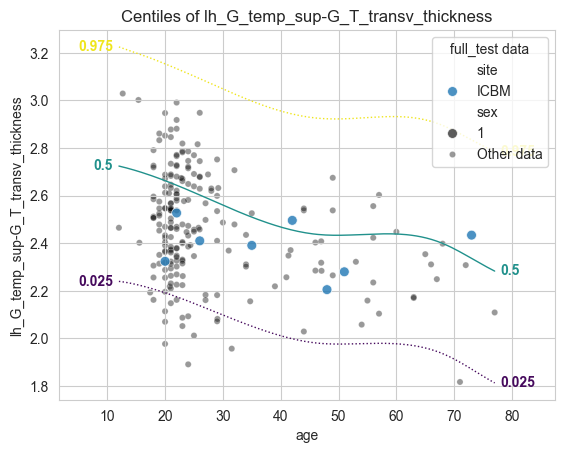

/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


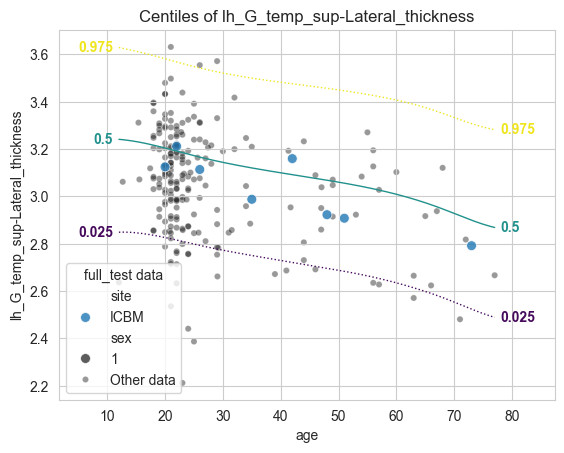

/opt/anaconda3/envs/pcn_crash_course/lib/python3.12/site-packages/pcntoolkit/util/plotter.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_be_df["marker"] = ["Other data"] * len(non_be_df)


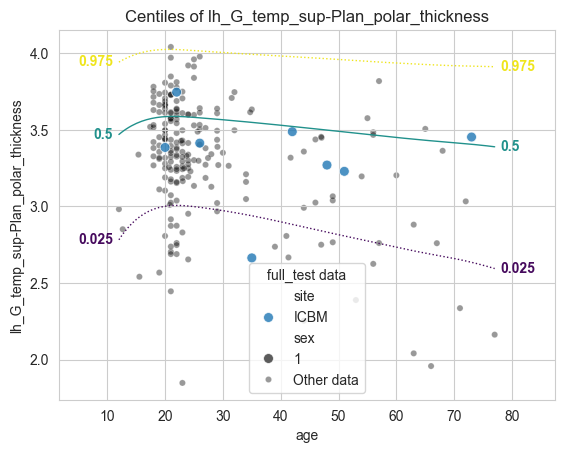

In [14]:
from pcntoolkit.util.plotter import *

plot_centiles(
    new_hbr_model,
    test,
    batch_effects={"site": ["ICBM"], "sex": ["1"]},
    cummul_densities=[0.025, 0.5, 0.975],
    show_data=True,
    show_other_data=True,
    cmap="",
)

In [ ]:
runner = Runner(
    cross_validate=True,
    cv_folds=3,
    parallelize=True,
    time_limit="00:10:00",
    job_type="slurm",
    n_jobs=2,
    log_dir=os.path.join(sandbox_dir, "log_dir"),
    temp_dir=os.path.join(sandbox_dir, "temp_dir"),
)

runner.fit_predict(new_hbr_model, train, test, observe=True)